In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [8]:
df['Glucose']= np.where(df['Glucose']==0, df['Glucose'].median(), df['Glucose'])
df['BloodPressure']= np.where(df['BloodPressure']==0, df['BloodPressure'].median(), df['BloodPressure'])
df['SkinThickness']= np.where(df['SkinThickness']==0, df['SkinThickness'].median(), df['SkinThickness'])
df['BMI']= np.where(df['BMI']==0, df['BMI'].median(), df['BMI'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,23.0,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,79.799479,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,115.244002,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


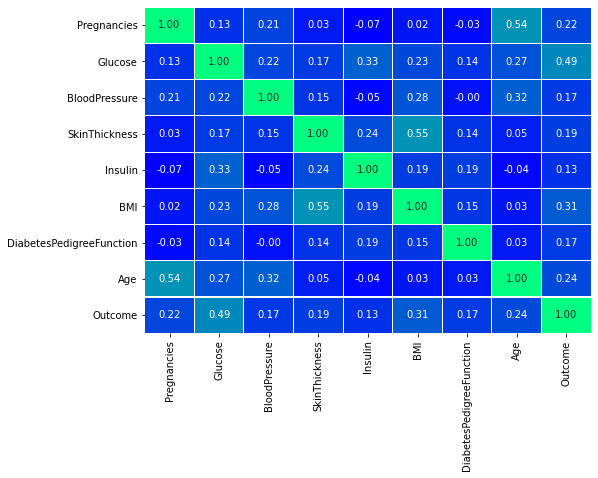

In [10]:
df_corr = df.corr()
fig,ax = plt.subplots(figsize = (8,6))
ax = sns.heatmap(df_corr, annot= True, fmt='.2f',lw=0.2, cmap='winter', cbar=False)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rfc = RandomForestClassifier(n_estimators=10)

In [13]:
X = df.drop('Outcome', axis=1)
y= df['Outcome']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=30)

In [16]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [17]:
rfc.score(X_train,y_train)

0.995114006514658

In [18]:
y_preds=rfc.predict(X_test)

In [19]:
y_preds

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [20]:
rfc.score(X_test,y_test)

0.7987012987012987

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [22]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       104
           1       0.77      0.54      0.64        50

    accuracy                           0.80       154
   macro avg       0.79      0.73      0.75       154
weighted avg       0.80      0.80      0.79       154



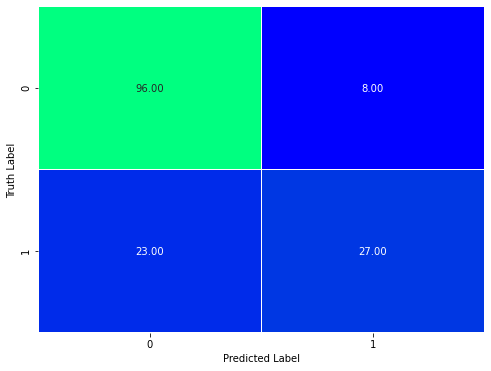

In [23]:
fig,ax = plt.subplots(figsize = (8,6))
ax = sns.heatmap(confusion_matrix(y_test,y_preds), annot= True, fmt='.2f',lw=0.2, cmap='winter', cbar=False)
ax.set(xlabel = 'Predicted Label', ylabel = 'Truth Label');

In [24]:
print(accuracy_score(y_test,y_preds))

0.7987012987012987


In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
cvs = cross_val_score(rfc,X,y,cv=10, scoring ='accuracy')

In [27]:
cvs

array([0.68831169, 0.74025974, 0.7012987 , 0.67532468, 0.7012987 ,
       0.77922078, 0.72727273, 0.81818182, 0.68421053, 0.85526316])

In [28]:
cvs.mean()

0.7370642515379358

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Numberof features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of level in tree
max_depth = [int(x) for x in np.linspace(10,1000,10)]
# Maximum number of samples required to split a node
min_samples_split=[2,5,10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,3,4,5,7,9]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                 'criterion': ['entropy','gini']}
print(random_grid)
               

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 3, 4, 5, 7, 9], 'criterion': ['entropy', 'gini']}


In [32]:
rf_randomcv = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid,
                                 n_iter=100, cv=10,verbose=2,random_state=100, n_jobs=-1)

In [33]:
rf_randomcv.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=10),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 4, 5, 7, 9],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [34]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 120,
 'criterion': 'entropy'}

In [36]:
rf_randomcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=120, max_features='log2',
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200)

In [37]:
best_random_grid = rf_randomcv.best_estimator_

In [38]:
y_preds = best_random_grid.predict(X_test)

In [39]:
print(classification_report(y_test,y_preds))
print(confusion_matrix(y_test,y_preds))
print(accuracy_score(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       104
           1       0.69      0.62      0.65        50

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154

[[90 14]
 [19 31]]
0.7857142857142857


In [40]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {
    'criterion':[rf_randomcv.best_params_['criterion']],
    'max_depth':[rf_randomcv.best_params_['max_depth']],
    'max_features':[rf_randomcv.best_params_['max_features']],
    'min_samples_leaf':[rf_randomcv.best_params_['min_samples_leaf'],
                        rf_randomcv.best_params_['min_samples_leaf']+2,
                        rf_randomcv.best_params_['min_samples_leaf']+4],
    'min_samples_split':[rf_randomcv.best_params_['min_samples_split']-2,
                        rf_randomcv.best_params_['min_samples_split']-1,
                        rf_randomcv.best_params_['min_samples_split'],
                        rf_randomcv.best_params_['min_samples_split']+1,
                        rf_randomcv.best_params_['min_samples_split']+2],
     'n_estimators':[rf_randomcv.best_params_['n_estimators']-200,
                     rf_randomcv.best_params_['n_estimators']-100,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators']+100,
                     rf_randomcv.best_params_['n_estimators']+200]
}
print(param_grid)

{'criterion': ['entropy'], 'max_depth': [120], 'max_features': ['log2'], 'min_samples_leaf': [5, 7, 9], 'min_samples_split': [8, 9, 10, 11, 12], 'n_estimators': [0, 100, 200, 300, 400]}


In [46]:
grid_search=GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.76049709 0.75729773 0.76369646 0.76536224        nan
 0.75401904 0.75883131 0.76536224 0.75401904        nan 0.76536224
 0.76047065 0.76538868 0.75719196        nan 0.76866737 0.76203067
 0.75885775 0.76369646        nan 0.77347964 0.76047065 0.76052353
 0.76210999        nan 0.7556055  0.75716552 0.76374934 0.76861449
        nan 0.7572184  0.76049709 0.75391327 0.76210999        nan
 0.75396616 0.7556055  0.75549974 0.76361713        nan 0.75885775
 0.75713908 0.75883131 0.76203067        nan 0.75074035 0.76044421
 0.76049709 0.75552618        nan 0.76039133 0.76205711 0.75549974
 0.75557906        nan 0.75883131 0.75880487 0.75552618 0.75885775
        nan 0.76205711 0.76041777 0.75391327 0.75071391        nan
 0.75549974 0.76692226 0.75066103 0.76364357        nan 0.7653358
 0.75885775 0.76369646 0.7604442

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=10),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [120],
                         'max_features': ['log2'],
                         'min_samples_leaf': [5, 7, 9],
                         'min_samples_split': [8, 9, 10, 11, 12],
                         'n_estimators': [0, 100, 200, 300, 400]},
             verbose=2)

In [52]:
best_grid= grid_search.best_estimator_

In [53]:
best_grid

RandomForestClassifier(criterion='entropy', max_depth=120, max_features='log2',
                       min_samples_leaf=5, min_samples_split=12)

In [54]:
y_pred = best_grid.predict(X_test)

In [55]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       104
           1       0.69      0.62      0.65        50

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154

[[90 14]
 [19 31]]
0.7857142857142857
